In [49]:
#Importing libraries
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import datetime as dt
from datetime import datetime
import pandas as pd
import yfinance as yf
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import accuracy_score,log_loss,precision_score,roc_auc_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

## Download Amazon stock data from 1997 -2023 from Yahoo Finance

In [50]:
# Get Amazon's stock amzn_df from yahoo finance
stock = yf.Ticker("AMZN")
amzn_total = stock.history(period="max")
amzn_total.to_csv("Amzn_data.csv")
amzn_total.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


### Dividend History

In [3]:
stock.dividends

Series([], Name: Dividends, dtype: float64)

### Stock Split History

In [4]:
stock.splits

Date
1998-06-02 00:00:00-04:00     2.0
1999-01-05 00:00:00-05:00     3.0
1999-09-02 00:00:00-04:00     2.0
2022-06-06 00:00:00-04:00    20.0
Name: Stock Splits, dtype: float64

## AMZN Stock Price History 1997 - 2023

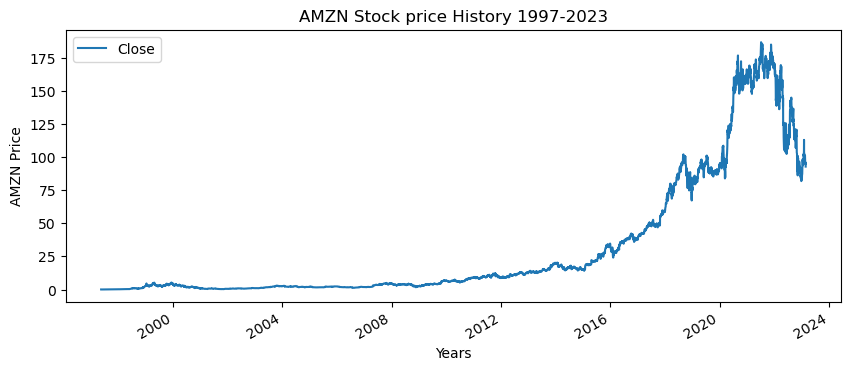

In [5]:
amzn_total["Close"].plot(figsize=(10,4))
plt.xlabel("Years")
plt.ylabel("AMZN Price")
plt.title("AMZN Stock price History 1997-2023")
plt.legend()
plt.show()

In [6]:
amzn_total.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6488.000000,6488.000000,6488.000000,6488.000000,6.488000e+03,6488.0,6488.000000
mean,31.330166,31.706011,30.915859,31.317374,1.429015e+08,0.0,0.004162
std,48.006715,48.568404,47.377267,47.970211,1.403504e+08,0.0,0.253506
min,0.070313,0.072396,0.065625,0.069792,9.744000e+06,0.0,0.000000
25%,1.993875,2.024875,1.956438,1.999375,6.910350e+07,0.0,0.000000
50%,6.390500,6.471250,6.288750,6.379750,1.061460e+08,0.0,0.000000
75%,38.222251,38.441126,37.945001,38.207250,1.611335e+08,0.0,0.000000
max,187.199997,188.654007,184.839493,186.570496,2.086584e+09,0.0,20.000000


## AMZN Stock Price History from 2018 - 2023

In [7]:
# import yfinance as yf
# Fetch daily stock price amzn_df of Amazon
amzn_df = yf.download('AMZN','2018-01-01','2023-01-31')
amzn_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02 00:00:00-05:00,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03 00:00:00-05:00,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04 00:00:00-05:00,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05 00:00:00-05:00,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08 00:00:00-05:00,61.799999,62.653999,61.601501,62.343498,62.343498,85590000


## Date Time Conversion

In [8]:
amzn_df.reset_index(inplace=True)
amzn_df["Date"] = pd.to_datetime(amzn_df['Date']).dt.date
amzn_df = amzn_df.set_index("Date")
amzn_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000
...,...,...,...,...,...,...
2023-01-24,96.930000,98.089996,96.000000,96.320000,96.320000,66929500
2023-01-25,92.559998,97.239998,91.519997,97.180000,97.180000,94261600
2023-01-26,98.239998,99.489998,96.919998,99.220001,99.220001,68523600


## Data Description

In [9]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1278 entries, 2018-01-02 to 2023-01-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1278 non-null   float64
 1   High       1278 non-null   float64
 2   Low        1278 non-null   float64
 3   Close      1278 non-null   float64
 4   Adj Close  1278 non-null   float64
 5   Volume     1278 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 69.9+ KB


## Descriptive Statistics

In [10]:
amzn_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1.278000e+03
mean,119.496002,120.941193,117.888139,119.424986,119.424986,8.640931e+07
std,35.544385,35.917920,35.117962,35.473358,35.473358,4.041521e+07
min,58.599998,59.500000,58.525501,59.450500,59.450500,1.762600e+07
25%,89.003252,89.778753,87.914001,88.915251,88.915251,5.910318e+07
50%,106.660000,108.829250,104.324001,107.021500,107.021500,7.498000e+07
75%,158.100754,159.745003,156.024872,157.926624,157.926624,1.022290e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.113460e+08


## AMZN Technical Indicators

## Closing Price

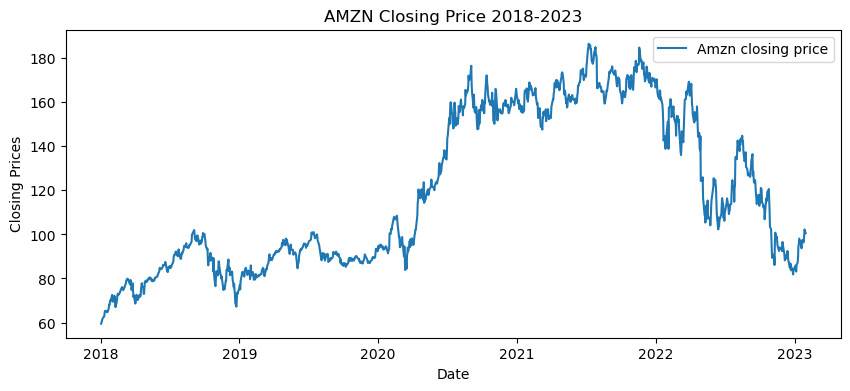

In [11]:
amzn_df['Close'].plot(figsize=(10,4))
plt.title('AMZN' + ' Closing Price 2018-2023', fontsize = 12)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend(['Amzn closing price'],loc='upper right')
plt.show()

## AMZN DAILY RETURNS

The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value.

r = (p1 — p0) / p0

where r is the rate of return, p1 refers to current price while p0 is the initial price.

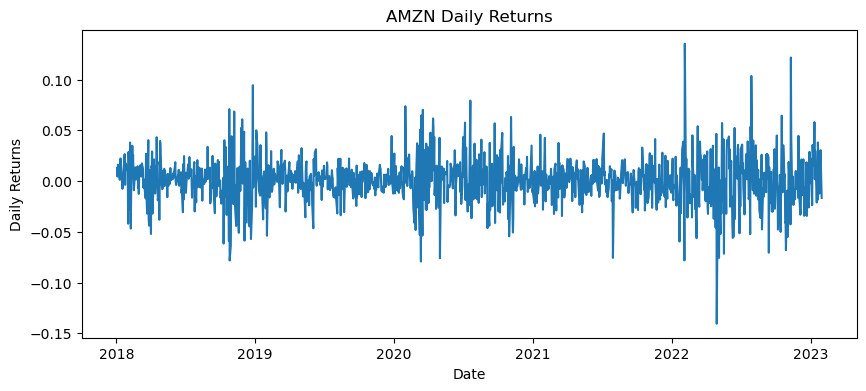

In [12]:
amzn_daily_returns = amzn_df['Close'].pct_change()
#amzn_daily_returns.plot(kind='hist', bins=60, kde=True)
amzn_daily_returns.plot(kind='line', figsize=(10,4))

plt.title('AMZN' + ' Daily Returns', fontsize = 12)
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()

## AMZN Cummulative Returns

The cumulative return is the total change in the investment price over a set time—an aggregate return, not an annualized one.

The cumulative return is equal to your gain (or loss) as a percentage of your original investment. Thus, the formula for cumulative return is:

Rc = ( Pcurrent – Pinitial ) / Pinitial

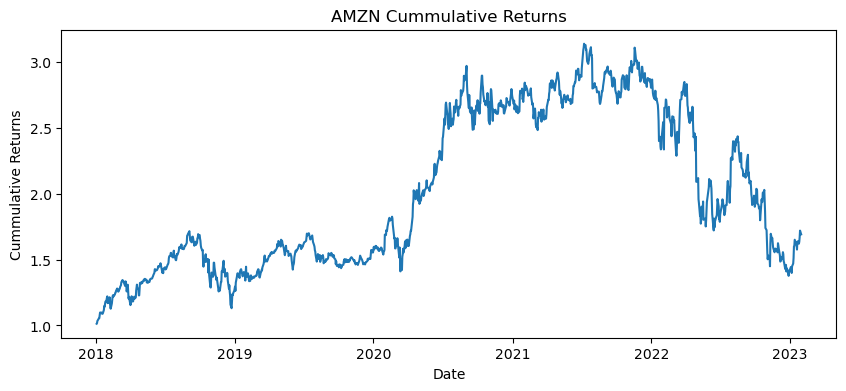

In [13]:
amzn_cum_returns = (amzn_daily_returns + 1).cumprod()
amzn_cum_returns.plot(figsize=(10,4))
plt.title('AMZN' + ' Cummulative Returns', fontsize = 12)
plt.xlabel('Date')
plt.ylabel('Cummulative Returns')
plt.show()

## $$Trend Indicators - Simple Moving Averages, Exponential Moving Averages, MACD$$

## Simple Moving Average(SMA)

SMA= A1+A2+....+An/n

where:
A=Closing prices for n days
n=Number of time periods

Simple moving averages (SMAs) are used to chart the long-term trajectory of a stock or other security, while ignoring the noise of day-to-day price movements. This allows amzn_dfaders to compare medium- and long-term amzn_dfends over a larger time horizon. For example, if the 200-day SMA of a security falls below its 50-day SMA, this is usually interpreted as a bearish death cross pattern and a signal of further declines. The opposite pattern, the golden cross, indicates potential for a market rally.

In [14]:
# Calculate simple moving average using .rolling(window).() , with window size = 30 & 60

amzn_df['SMA30'] = amzn_df['Close'].rolling(30).mean()
amzn_df['SMA60'] = amzn_df['Close'].rolling(60).mean()
amzn_df

# Remove all the NULL values using dropna() method
amzn_df.dropna(inplace=True)

# Calculate the EMA creating a amzn_dfframe

amzn_df['EMA 30']= amzn_df['Close'].ewm(span=30, adjust=False).mean()
amzn_df['EMA 60']= amzn_df['Close'].ewm(span=60, adjust=False).mean()

# Print amzn_df
amzn_df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30,SMA60,EMA 30,EMA 60
Date,,,,,,,,,,
2018-03-28,72.349998,72.794998,69.308502,71.570999,71.570999,274106000,76.241450,71.495425,71.570999,71.570999
2018-03-29,70.300003,72.773499,68.260002,72.366997,72.366997,251622000,76.235267,71.710700,71.622354,71.597097
2018-04-02,70.880997,71.068001,67.750000,68.599503,68.599503,209272000,76.085650,71.850525,71.427331,71.498816
2018-04-03,69.569000,70.699997,67.766502,69.602501,69.602501,204624000,75.991250,72.002575,71.309600,71.436641
2018-04-04,67.912003,70.769501,67.643997,70.528503,70.528503,139646000,75.894950,72.153767,71.259207,71.406866


## Simple Moving Average Ribbons

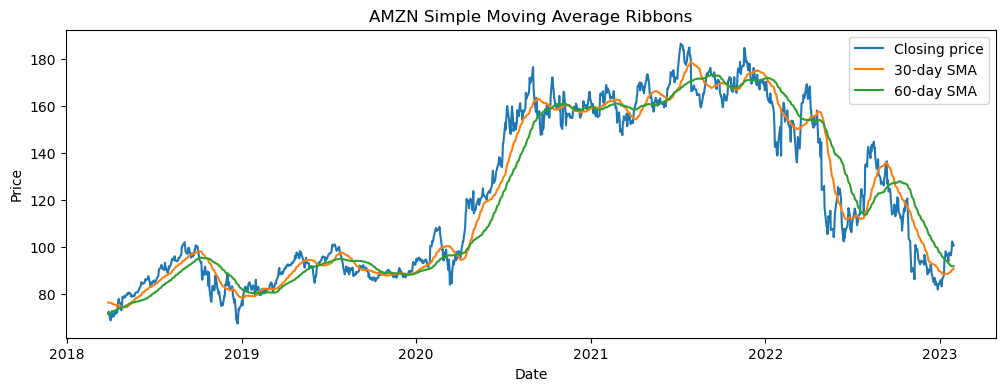

In [15]:
amzn_df['Close'].plot(kind= "line",label='Closing price', figsize=(12,4))
amzn_df['SMA30'].plot(kind= "line",label='30-day SMA')
amzn_df['SMA60'].plot(kind= "line",label='60-day SMA')
plt.title("AMZN Simple Moving Average Ribbons", fontsize = 12)
#plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

## Exponential Moving Averages Ribbons

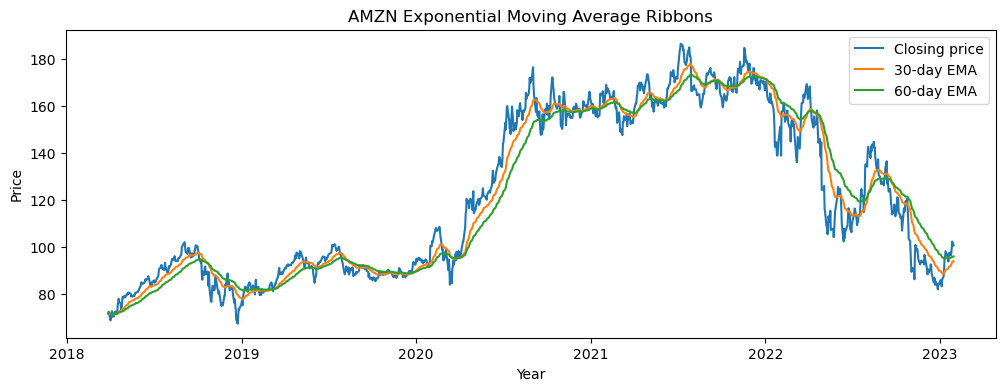

In [16]:
amzn_df['Close'].plot(kind= "line",label='Closing price', figsize=(12,4))
amzn_df['EMA 30'].plot(kind= "line",label='30-day EMA')
amzn_df['EMA 60'].plot(kind= "line",label='60-day EMA')
plt.title("AMZN Exponential Moving Average Ribbons", fontsize = 12)
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

## MACD - Moving Average convergence Divergence Indicator

 Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.

MACD LINE = FAST LENGTH EMA - SLOW LENGTH EMA

MACD crossing above the centerline – Uptrend
MACD crossing below the centerline – Downtrend
MACD crossing above the signal line – Buy
MACD crossing below the signal line – Sell



When the MACD falls below the signal line, it is a bearish signal that indicates that it may be time to sell. Conversely, when the MACD rises above the signal line, the indicator gives a bullish signal, which suggests that the price of the asset is likely to experience upward momentum.

The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

#### MACD=12-Period EMA − 26-Period EMA

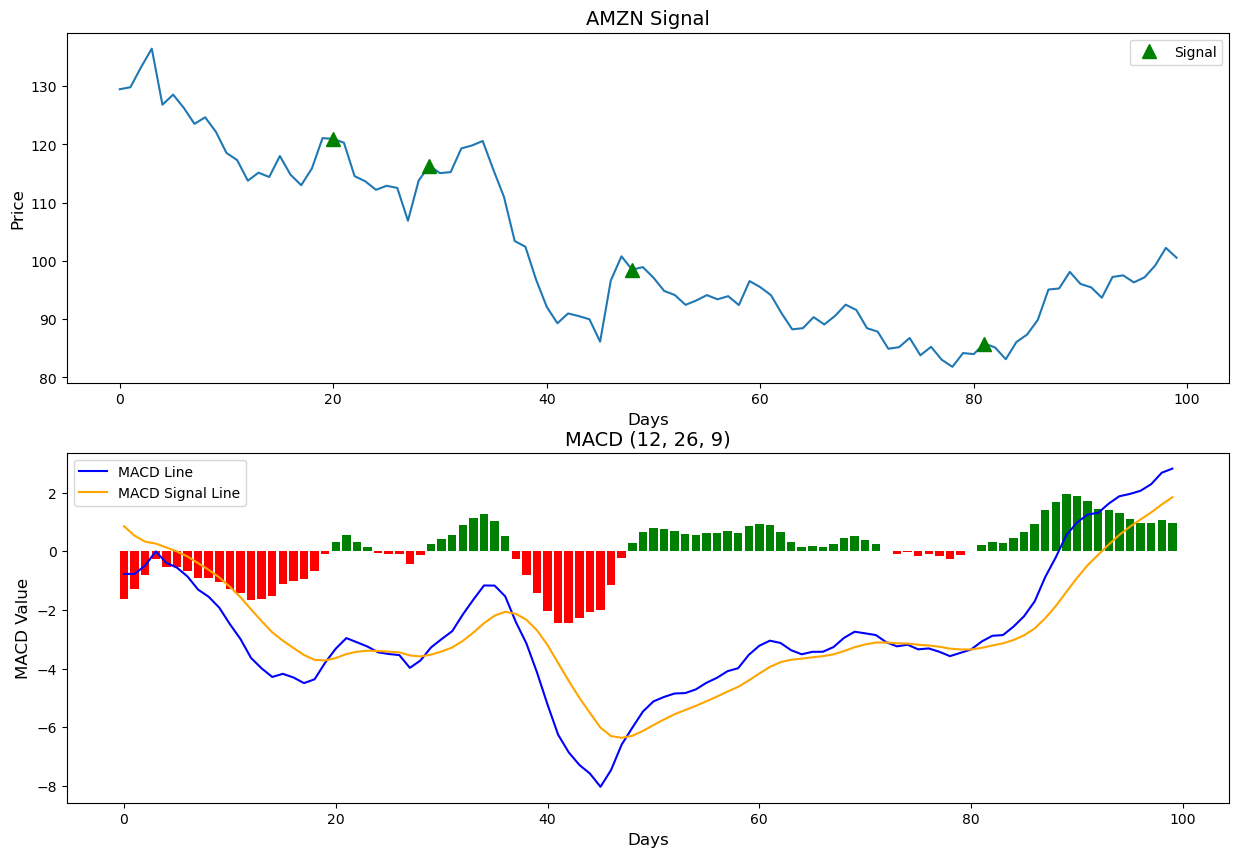

In [17]:
# # Calculating the MACD line, signal line and MACD histogram
amzn_df['macd_line'], \
amzn_df['macd_signal_line'], \
amzn_df['macd_hist'] = ta.MACD(amzn_df['Close'])

# Drop the NaN values
amzn_df.dropna(inplace=True)

# Generate buy signals
# Use 1 for buy and 0 for no action
amzn_df['macd_signal'] = np.where(amzn_df['macd_line'] > amzn_df['macd_signal_line'], 1, 0)


# Show the last 100 points for illusamzn_dfation purposes
amzn_df_for_plot = amzn_df[-100:]
num_of_x_values = amzn_df_for_plot['Close'].shape[0]

# For plotting

# Define the plot figure
fig = plt.figure(figsize=(15, 10))

# Sub plot for the close price and enamzn_dfy signal
ax1 = fig.add_subplot(211)

# Set the title and axis labels
ax1.set_title('AMZN Signal', fontsize=14)
ax1.set_xlabel('Days', fontsize=12)
ax1.set_ylabel('Price', fontsize=12)

# Plot close price
ax1.plot(range(num_of_x_values), amzn_df_for_plot['Close'])

# Plot long enamzn_dfy points
enamzn_dfy_condition_to_plot = np.where((amzn_df_for_plot['macd_signal'] == 1) &
                                   (amzn_df_for_plot['macd_signal'].shift(1) == 0),
                                   amzn_df_for_plot['Close'], np.nan)

ax1.plot(range(num_of_x_values), enamzn_dfy_condition_to_plot, '^',
         ms=10, label='Signal', color='green')
ax1.legend()

# Sub plot for the MACD line, signal line and MACD histogram
ax2 = fig.add_subplot(212)
ax2.set_title(('MACD (12, 26, 9)'), fontsize=14)
ax2.set_xlabel('Days', fontsize=12)
ax2.set_ylabel('MACD Value', fontsize=12)

# Plot the MACD line and signal line
ax2.plot(range(num_of_x_values),
         amzn_df_for_plot['macd_line'], label='MACD Line', color='blue')
ax2.plot(range(num_of_x_values), amzn_df_for_plot['macd_signal_line'],
         label='MACD Signal Line', color='orange')

# Set colour of the MACD histogram
macd_hist_color = ['green' if (
    x > 0) else 'red' for x in amzn_df_for_plot.macd_hist]

# Plot MACD histogram
ax2.bar(range(num_of_x_values), amzn_df_for_plot['macd_hist'], color=macd_hist_color)
ax2.legend()

plt.show()

## $$Volatility Indicators$$

## Bollinger Bands

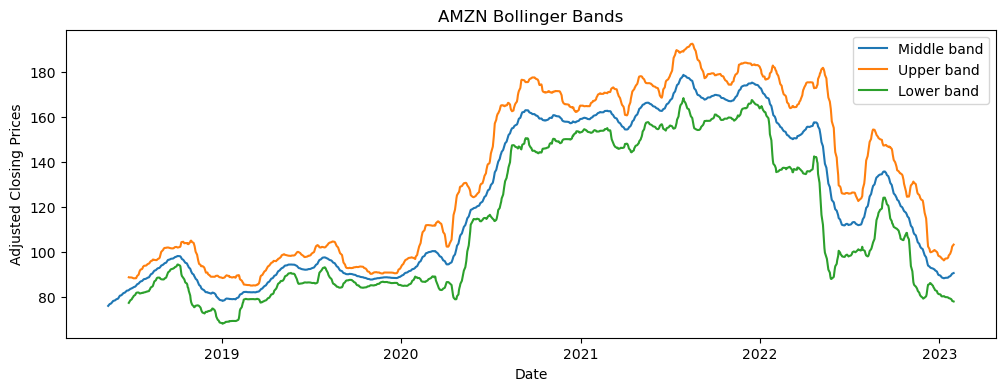

In [18]:
std = amzn_df['Close'].rolling(30).std() # <-- Get rolling standard deviation for 30 days

bollinger_middle = amzn_df['SMA30'] # Calculate middle band
bollinger_up = amzn_df['SMA30'] + std * 2 # Calculate top band
bollinger_down = amzn_df['SMA30'] - std * 2 # Calculate bottom band

#plot
plt.figure(figsize=(12, 4))
plt.plot(amzn_df['SMA30'], label= 'Middle band')
plt.plot(amzn_df['SMA30'] + std * 2, label='Upper band')
plt.plot(amzn_df['SMA30'] - std * 2, label='Lower band')

#labels
plt.title("AMZN Bollinger Bands", fontsize = 12)
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Prices')
plt.legend()
plt.show()

## Keltner Channels

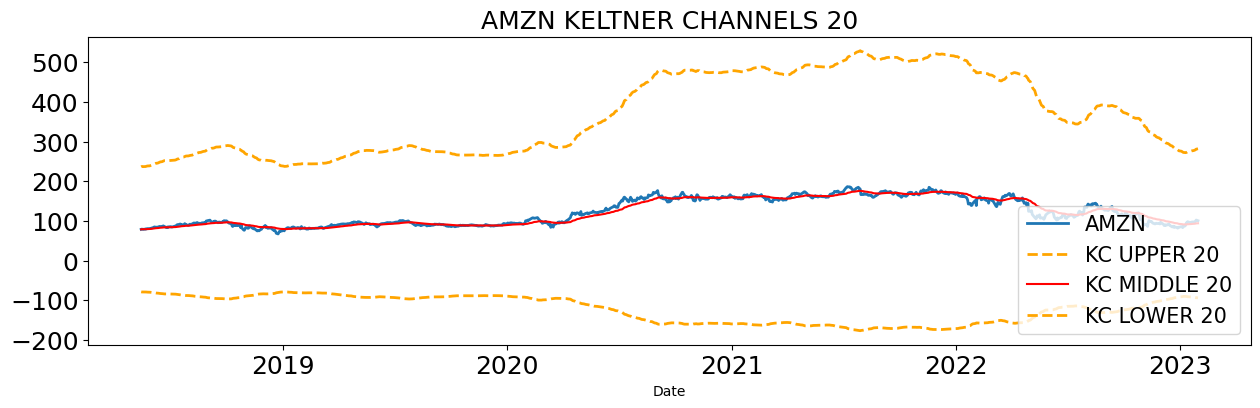

In [19]:
# KELTNER CHANNEL CALCULATION

amzn_df["amzn_df1"] = amzn_df["High"] - amzn_df["Low"]
amzn_df["amzn_df2"] = abs(amzn_df["High"] - amzn_df["Close"].shift())
amzn_df["amzn_df3"]  = abs(amzn_df["Low"] - amzn_df["Close"].shift())
aamzn_df = amzn_df["Close"].ewm(alpha = 1/20).mean()

amzn_df["kc_middle"] = amzn_df["Close"].ewm(20).mean()
amzn_df["kc_upper"] = amzn_df["Close"].ewm(20).mean() + 2 * aamzn_df
amzn_df["kc_lower"] = amzn_df["Close"].ewm(20).mean() - 2 * aamzn_df

# Plotting Keltner Channels

amzn_df["Close"].plot( linewidth = 2, label = 'AMZN', fontsize = 18, figsize = (15,4))
amzn_df['kc_upper'].plot( linewidth = 2, color = 'orange', linestyle = '--', label = 'KC UPPER 20')
amzn_df['kc_middle'].plot( linewidth = 1.5, color = 'red', label = 'KC MIDDLE 20')
amzn_df['kc_lower'].plot( linewidth = 2, color = 'orange', linestyle = '--', label = 'KC LOWER 20')
plt.legend(loc = 'lower right', fontsize = 15)
plt.title('AMZN KELTNER CHANNELS 20', fontsize = 18)
plt.show()

## $$Momentum Indictors$$

## RSI Indicator

The Relative Strength Index (RSI) is a momentum indicator that describes the current price relative to average high and low prices over a previous trading period. This indicator estimates overbought or oversold status and helps spot trend reversals, price pullbacks, and the emergence of bullish or bearish markets.It indicates if given asset is priced too high or too low.

When RSI values are:

above 70, asset is considered overbought (overvalued)
below 30, asset is considered oversold (undervalued)

Divergence between price and RSI values:

Bullish divergence: price is trending down, RSI values are increasing (possible Long entry)
Bearish divergence: price is trending up, RSI values are decreasing (possible Short entry)

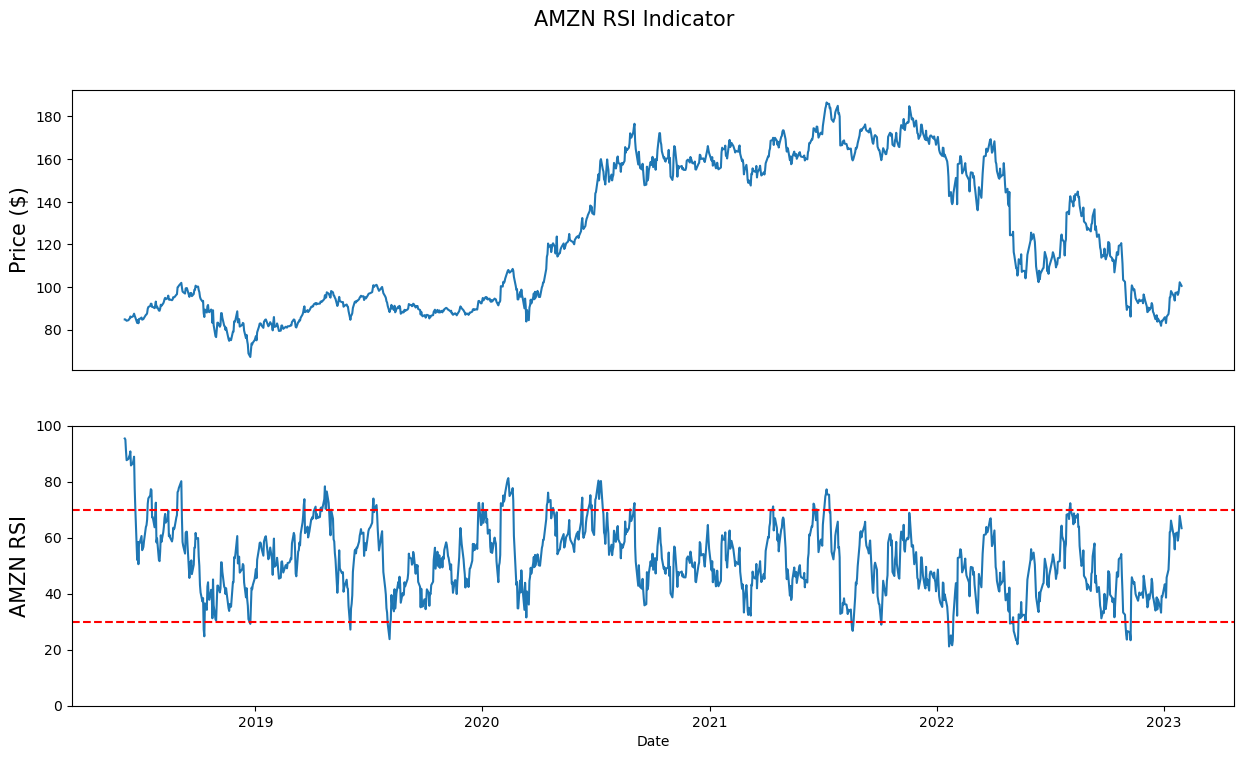

In [20]:
delta = amzn_df['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
amzn_df['RSI'] = 100 - (100/(1 + rs))
# Skip first 14 days to have real values
amzn_df = amzn_df.iloc[14:]
#print(amzn_df)
fig, (ax1, ax2) = plt.subplots(2)
ax1.get_xaxis().set_visible(False)
fig.suptitle('AMZN RSI Indicator', fontsize = 15)
amzn_df['Close'].plot(ax=ax1,figsize= (15,8))
ax1.set_ylabel('Price ($)', fontsize =15)
amzn_df['RSI'].plot(ax=ax2)
ax2.set_ylim(0,100)
ax2.axhline(30, color='r', linestyle='--')
ax2.axhline(70, color='r', linestyle='--')
ax2.set_ylabel('AMZN RSI', fontsize =15)
plt.show()

## Stochastic Oscillator (SR)

Stochastic oscillators measure the momentum of an asset's price to determine trends and predict reversals.

Stochastic oscillators measure recent prices on a scale of 0 to 100, with measurements above 80 indicating that an asset is overbought and measurements below 20 indicating that it is oversold.

In [21]:
import logging
import re
import warnings
logging.captureWarnings(True)
warnings.filterwarnings('always', category=DeprecationWarning,
                        module=r'^{0}\.'.format(re.escape(__name__)))
warnings.warn("This is a DeprecationWarning",category=DeprecationWarning)

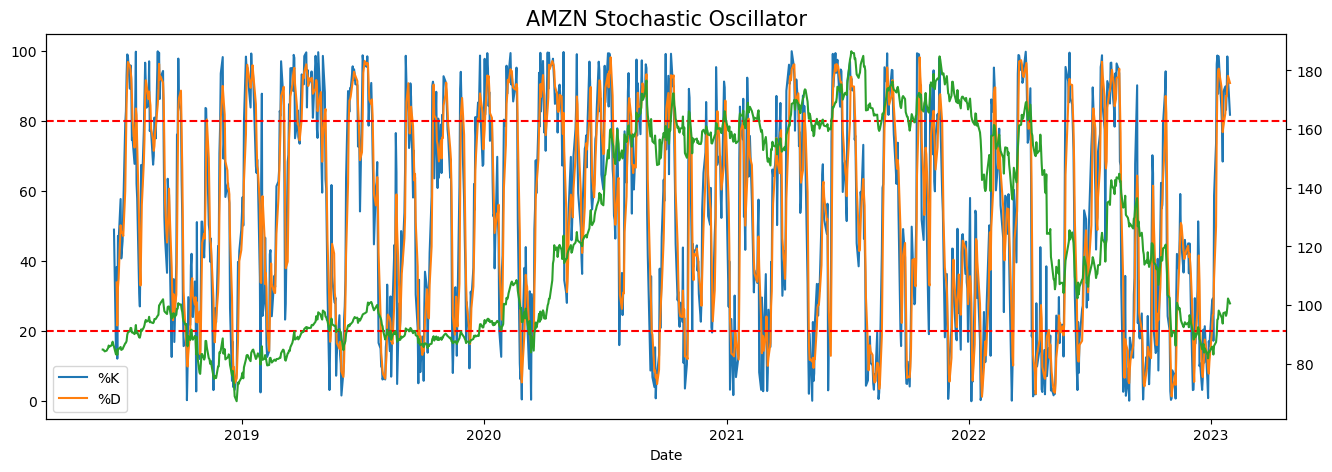

In [22]:

amzn_df['14-high'] = amzn_df['High'].rolling(14).max()
amzn_df['14-low'] = amzn_df['Low'].rolling(14).min()
amzn_df['%K'] = (amzn_df['Close'] - amzn_df['14-low'])*100/(amzn_df['14-high'] - amzn_df['14-low'])
amzn_df['%D'] = amzn_df['%K'].rolling(3).mean()
ax = amzn_df[['%K', '%D']].plot(figsize =(16,5))
amzn_df['Adj Close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.title("AMZN Stochastic Oscillator", fontsize =15)
plt.show()

# **Trading Strategy using Simple Moving Averages**

In [23]:
#print(amzn_df.columns)

amzn =amzn_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA30', 'SMA60',
       'EMA 30', 'EMA 60']]

amzn

,Open,High,Low,Close,Adj Close,Volume,SMA30,SMA60,EMA 30,EMA 60
Date,,,,,,,,,,
2018-06-05,83.649498,84.949997,83.502998,84.817497,84.817497,95644000,79.446684,77.117242,79.413865,77.109995
2018-06-06,85.225502,85.724998,84.323502,84.787498,84.787498,109464000,79.839450,77.198375,79.760551,77.361716
2018-06-07,84.928001,84.995003,83.805496,84.464996,84.464996,75314000,80.221334,77.282642,80.064064,77.594611
2018-06-08,84.056000,84.472000,83.650497,84.199501,84.199501,59102000,80.498050,77.360133,80.330866,77.811165
2018-06-11,84.075500,84.711998,84.029503,84.456001,84.456001,46710000,80.692217,77.449133,80.597004,78.029028
...,...,...,...,...,...,...,...,...,...,...
2023-01-24,96.930000,98.089996,96.000000,96.320000,96.320000,66929500,89.371000,91.975833,92.066710,95.323983
2023-01-25,92.559998,97.239998,91.519997,97.180000,97.180000,94261600,89.640667,91.746167,92.396600,95.384836
2023-01-26,98.239998,99.489998,96.919998,99.220001,99.220001,68523600,89.929667,91.676333,92.836819,95.510579


### **Define Signal and Position**

In [24]:
amzn['Signal'] = 0.0
amzn['Signal'] = np.where(amzn['SMA60'] > amzn['SMA30'], 1, 0)

amzn['Position'] = amzn['Signal'].diff()
amzn.dropna(inplace=True)
amzn

,Open,High,Low,Close,Adj Close,Volume,SMA30,SMA60,EMA 30,EMA 60,Signal,Position
Date,,,,,,,,,,,,
2018-06-06,85.225502,85.724998,84.323502,84.787498,84.787498,109464000,79.839450,77.198375,79.760551,77.361716,0,0.0
2018-06-07,84.928001,84.995003,83.805496,84.464996,84.464996,75314000,80.221334,77.282642,80.064064,77.594611,0,0.0
2018-06-08,84.056000,84.472000,83.650497,84.199501,84.199501,59102000,80.498050,77.360133,80.330866,77.811165,0,0.0
2018-06-11,84.075500,84.711998,84.029503,84.456001,84.456001,46710000,80.692217,77.449133,80.597004,78.029028,0,0.0
2018-06-12,84.650002,84.975502,84.575996,84.937500,84.937500,45184000,80.913250,77.555025,80.877036,78.255535,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-24,96.930000,98.089996,96.000000,96.320000,96.320000,66929500,89.371000,91.975833,92.066710,95.323983,1,0.0
2023-01-25,92.559998,97.239998,91.519997,97.180000,97.180000,94261600,89.640667,91.746167,92.396600,95.384836,1,0.0
2023-01-26,98.239998,99.489998,96.919998,99.220001,99.220001,68523600,89.929667,91.676333,92.836819,95.510579,1,0.0


## **Visualize cross-over chart**

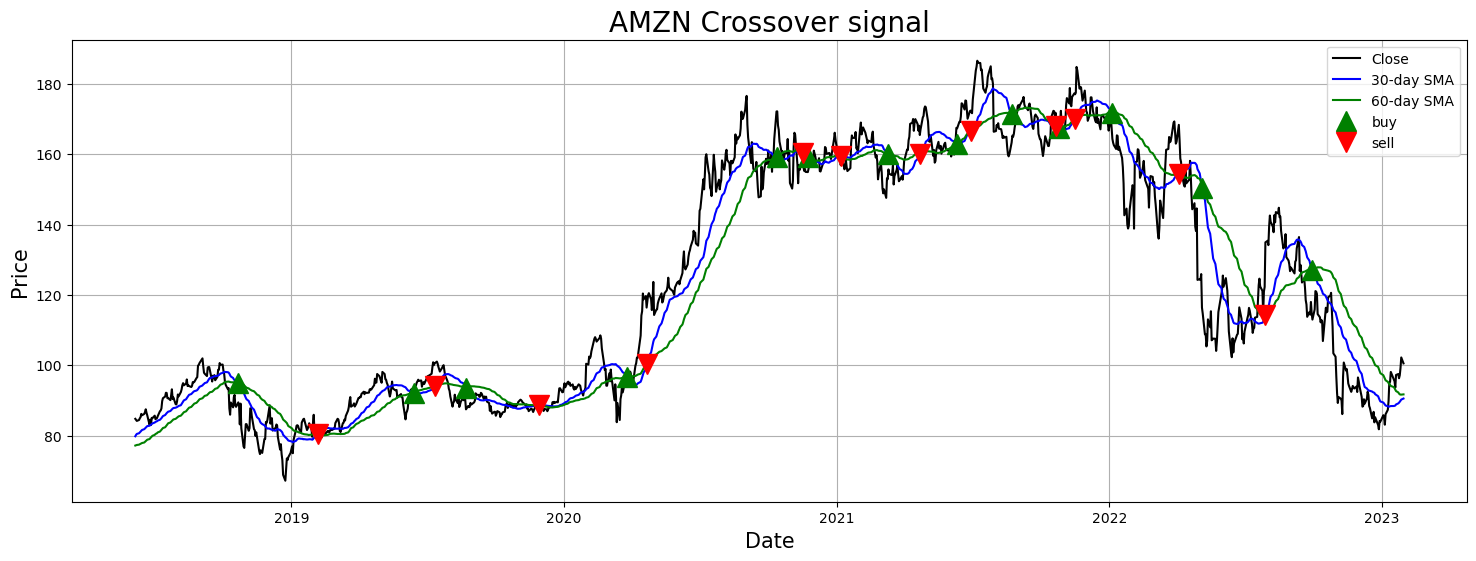

In [25]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
amzn['Close'].plot(color = 'k', label= 'Close', figsize=(18,6)) 
amzn['SMA30'].plot(color = 'b',label = '30-day SMA') 
amzn['SMA60'].plot(color = 'g', label = '60-day SMA')
# plot ‘buy’ signals
plt.plot(amzn[amzn['Position'] == 1].index, 
         amzn['SMA30'][amzn['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(amzn[amzn['Position'] == -1].index, 
         amzn['SMA30'][amzn['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('AMZN Crossover signal', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

**Mapping Buy or Sell Strategy with Signal value 1 and 0**

In [26]:
amzn['Strategy'] = np.where(amzn["Signal"] == 1, "Buy", "Sell")
amzn.to_csv("amzn.csv")
amzn

,Open,High,Low,Close,Adj Close,Volume,SMA30,SMA60,EMA 30,EMA 60,Signal,Position,Strategy
Date,,,,,,,,,,,,,
2018-06-06,85.225502,85.724998,84.323502,84.787498,84.787498,109464000,79.839450,77.198375,79.760551,77.361716,0,0.0,Sell
2018-06-07,84.928001,84.995003,83.805496,84.464996,84.464996,75314000,80.221334,77.282642,80.064064,77.594611,0,0.0,Sell
2018-06-08,84.056000,84.472000,83.650497,84.199501,84.199501,59102000,80.498050,77.360133,80.330866,77.811165,0,0.0,Sell
2018-06-11,84.075500,84.711998,84.029503,84.456001,84.456001,46710000,80.692217,77.449133,80.597004,78.029028,0,0.0,Sell
2018-06-12,84.650002,84.975502,84.575996,84.937500,84.937500,45184000,80.913250,77.555025,80.877036,78.255535,0,0.0,Sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-24,96.930000,98.089996,96.000000,96.320000,96.320000,66929500,89.371000,91.975833,92.066710,95.323983,1,0.0,Buy
2023-01-25,92.559998,97.239998,91.519997,97.180000,97.180000,94261600,89.640667,91.746167,92.396600,95.384836,1,0.0,Buy
2023-01-26,98.239998,99.489998,96.919998,99.220001,99.220001,68523600,89.929667,91.676333,92.836819,95.510579,1,0.0,Buy


## **Visualize the target Strategy**

In [27]:
count = amzn["Strategy"].value_counts().to_frame("Target")
count

,Target
Sell,636
Buy,535


## Target class distribution

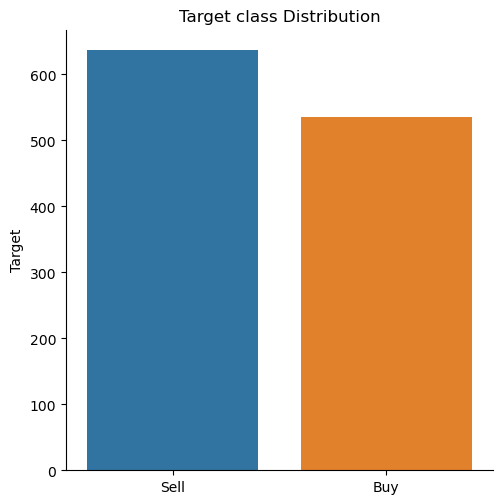

In [28]:
try:
    sns.catplot(data=count, x=count.index, y=count.Target, kind='bar')

except ValueError:
    pass  # do nothing!

plt.title("Target class Distribution")

plt.show()

### **Label encoding "Strategy"**

In [29]:
#Import label encoder

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
amzn['Strategy']= label_encoder.fit_transform(amzn['Strategy'])

amzn['Strategy'].unique()

array([1, 0])

## **Machine Learning Classification for predicting stock movement**

In [30]:
X = amzn.drop(['Strategy','Volume','Position','Signal'], axis=1)
y= amzn[['Strategy']]

X

,Open,High,Low,Close,Adj Close,SMA30,SMA60,EMA 30,EMA 60
Date,,,,,,,,,
2018-06-06,85.225502,85.724998,84.323502,84.787498,84.787498,79.839450,77.198375,79.760551,77.361716
2018-06-07,84.928001,84.995003,83.805496,84.464996,84.464996,80.221334,77.282642,80.064064,77.594611
2018-06-08,84.056000,84.472000,83.650497,84.199501,84.199501,80.498050,77.360133,80.330866,77.811165
2018-06-11,84.075500,84.711998,84.029503,84.456001,84.456001,80.692217,77.449133,80.597004,78.029028
2018-06-12,84.650002,84.975502,84.575996,84.937500,84.937500,80.913250,77.555025,80.877036,78.255535
...,...,...,...,...,...,...,...,...,...
2023-01-24,96.930000,98.089996,96.000000,96.320000,96.320000,89.371000,91.975833,92.066710,95.323983
2023-01-25,92.559998,97.239998,91.519997,97.180000,97.180000,89.640667,91.746167,92.396600,95.384836
2023-01-26,98.239998,99.489998,96.919998,99.220001,99.220001,89.929667,91.676333,92.836819,95.510579


In [31]:
y

,Strategy
Date,
2018-06-06,1
2018-06-07,1
2018-06-08,1
2018-06-11,1
2018-06-12,1
...,...
2023-01-24,0
2023-01-25,0
2023-01-26,0


In [32]:
print("Shape of X is:", X.shape)
print("Shape of y is", y.shape)

Shape of X is: (1171, 9)
Shape of y is (1171, 1)


## **Split the data into test and train**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

print("Shape of X_train is:", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_test is", y_test.shape)

Shape of X_train is: (936, 9)
Shape of y_train is (936, 1)
Shape of X_test is: (235, 9)
Shape of y_test is (235, 1)


## Modelling

In [34]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def run_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    pred_prob_test=model.predict_proba(X_test) 
    #calculating precision and reall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Accuracy = {}".format(accuracy))
    print('Precision: ', precision)
    print('Recall: ', recall)  
    print('F1 Score: ',f1)  
    
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    
    plot_confusion_matrix(model, X_test, y_test,cmap='Blues')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, precision, recall, f1, roc_auc

## Logistic Regression

Accuracy = 0.9872340425531915
Precision:  0.9916666666666667
Recall:  0.9834710743801653
F1 Score:  0.9875518672199171
Accuracy = 0.9872340425531915
ROC Area under Curve = 0.987349572277802
              precision    recall  f1-score   support

           0    0.98261   0.99123   0.98690       114
           1    0.99167   0.98347   0.98755       121

    accuracy                        0.98723       235
   macro avg    0.98714   0.98735   0.98723       235
weighted avg    0.98727   0.98723   0.98724       235



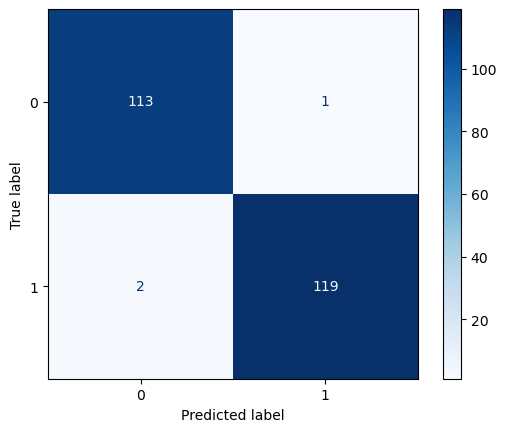

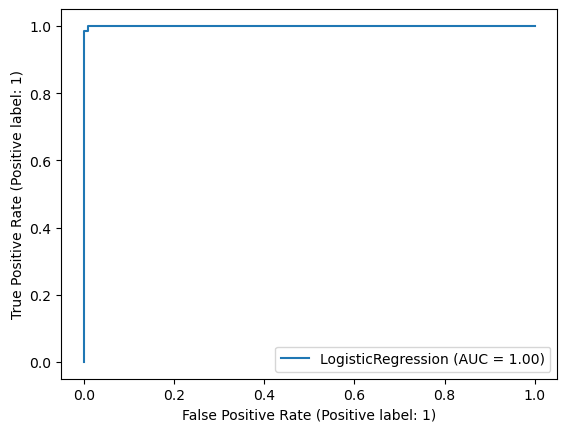

In [35]:
from sklearn.linear_model import LogisticRegression

params_lr = {"class_weight": None, "solver":'lbfgs', "max_iter":1000}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

## Decision Tree Classifier

Accuracy = 0.9234042553191489
Precision:  0.912
Recall:  0.9421487603305785
F1 Score:  0.9268292682926831
Accuracy = 0.9234042553191489
ROC Area under Curve = 0.9228287661302015
              precision    recall  f1-score   support

           0    0.93636   0.90351   0.91964       114
           1    0.91200   0.94215   0.92683       121

    accuracy                        0.92340       235
   macro avg    0.92418   0.92283   0.92324       235
weighted avg    0.92382   0.92340   0.92334       235



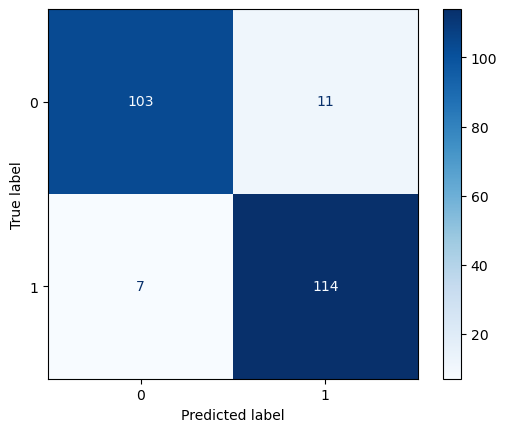

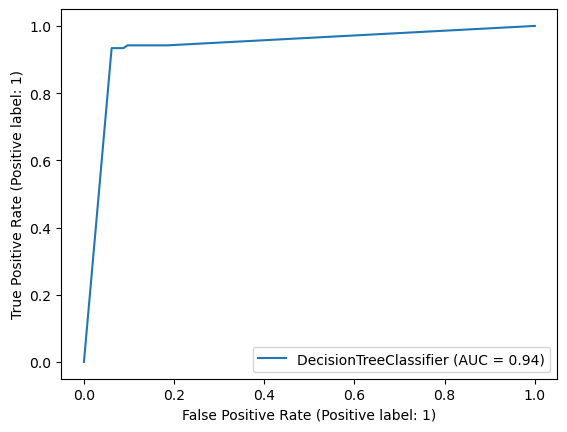

In [36]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

## Random Forest Classifier

Accuracy = 0.9531914893617022
Precision:  0.9583333333333334
Recall:  0.9504132231404959
F1 Score:  0.9543568464730291
Accuracy = 0.9531914893617022
ROC Area under Curve = 0.9532767870088444
              precision    recall  f1-score   support

           0    0.94783   0.95614   0.95197       114
           1    0.95833   0.95041   0.95436       121

    accuracy                        0.95319       235
   macro avg    0.95308   0.95328   0.95316       235
weighted avg    0.95324   0.95319   0.95320       235



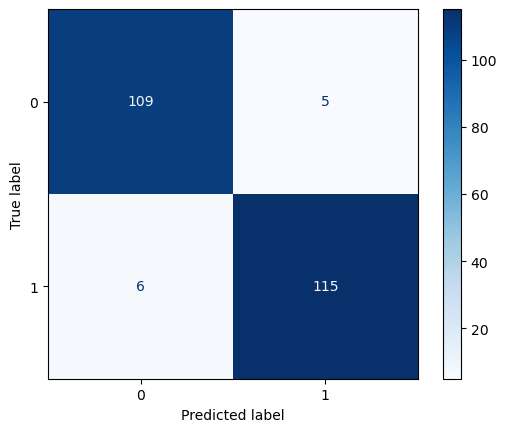

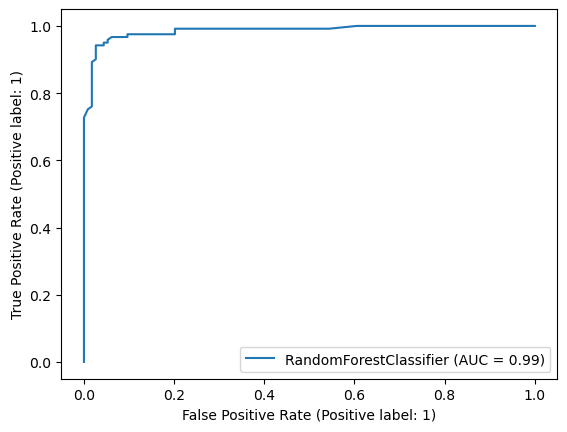

In [37]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 123}

model_rf = RandomForestClassifier(**params_rf)

model_rf, accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

## XG Boost Classifier

Accuracy = 0.9531914893617022
Precision:  0.9583333333333334
Recall:  0.9504132231404959
F1 Score:  0.9543568464730291
Accuracy = 0.9531914893617022
ROC Area under Curve = 0.9532767870088444
              precision    recall  f1-score   support

           0    0.94783   0.95614   0.95197       114
           1    0.95833   0.95041   0.95436       121

    accuracy                        0.95319       235
   macro avg    0.95308   0.95328   0.95316       235
weighted avg    0.95324   0.95319   0.95320       235



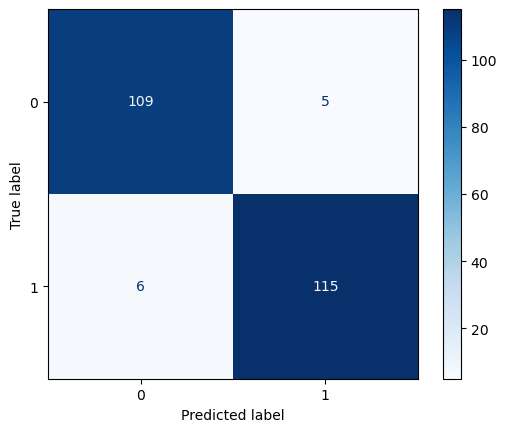

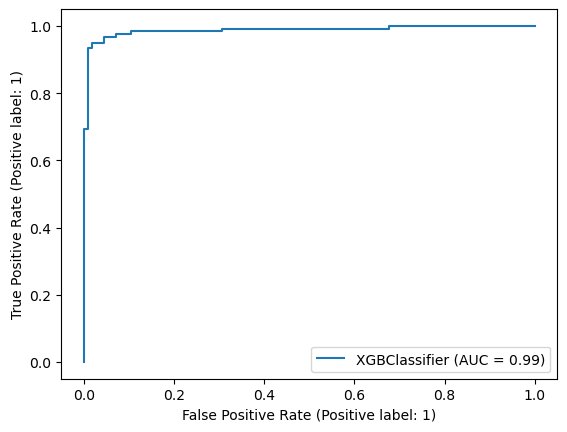

In [38]:
import xgboost as xgb

params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)

model_xgb, accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

## Support vector Machine Classifier

Accuracy = 0.9914893617021276
Precision:  0.9917355371900827
Recall:  0.9917355371900827
F1 Score:  0.9917355371900827
Accuracy = 0.9914893617021276
ROC Area under Curve = 0.9914818036827606
              precision    recall  f1-score   support

           0    0.99123   0.99123   0.99123       114
           1    0.99174   0.99174   0.99174       121

    accuracy                        0.99149       235
   macro avg    0.99148   0.99148   0.99148       235
weighted avg    0.99149   0.99149   0.99149       235



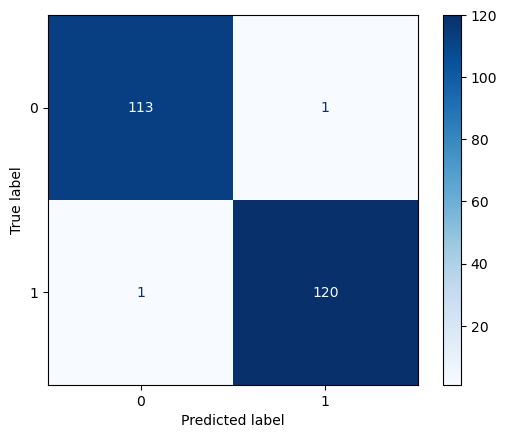

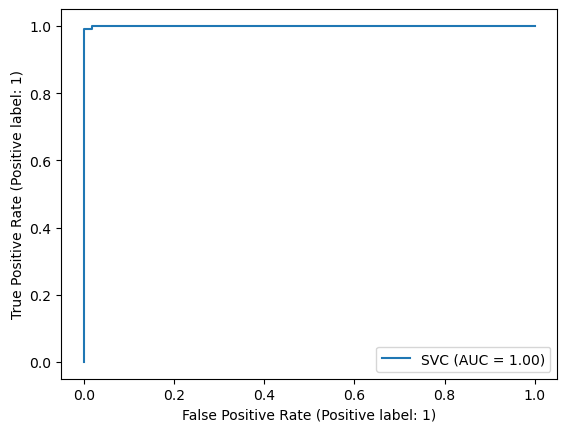

In [39]:
# import "Support Vector Classifier"

from sklearn.svm import SVC

params_svc ={"kernel":'linear', "probability":True, "class_weight":"balanced"}

model_svc= SVC(**params_svc)

model_svc, accuracy_svc, precision_svc, recall_svc, f1_svc, roc_auc_svc = run_model(model_svc, X_train, y_train, X_test, y_test)

## Accuracy Scores

In [40]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_svc]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','XGBoost', 'Support Vector Machine'],
              'Accuracy Score': accuracy_scores}

data = pd.DataFrame(model_data)
data["Accuracy Score"] = (data["Accuracy Score"]*100)

data

,Model,Accuracy Score
0,Logistic Regression,98.723404
1,Decision Tree,92.340426
2,Random Forest,95.319149
3,XGBoost,95.319149
4,Support Vector Machine,99.148936


In [41]:
data= data.sort_values(by= "Accuracy Score", ascending=True)
data

,Model,Accuracy Score
1,Decision Tree,92.340426
2,Random Forest,95.319149
3,XGBoost,95.319149
0,Logistic Regression,98.723404
4,Support Vector Machine,99.148936


## Plot the Accuracy Scores

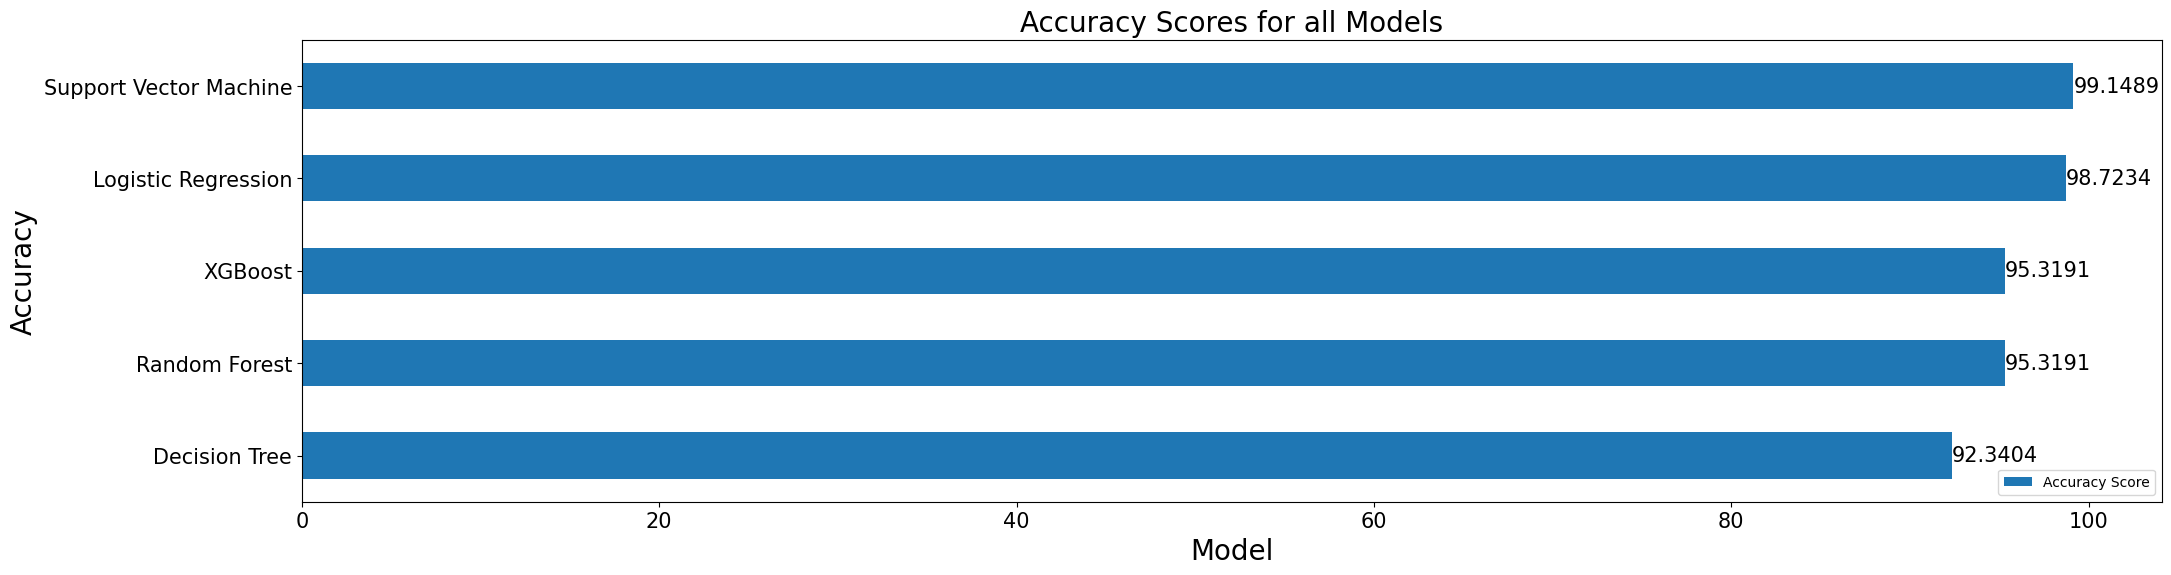

In [42]:
ax = data.sort_values(by="Accuracy Score", ascending = True).plot( x= "Model", y="Accuracy Score", kind='barh', figsize=(24,6), fontsize=15)
ax.bar_label(ax.containers[0], fontsize=15)
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Scores for all Models", fontsize=20)
plt.show()

## Model Evaluation Metrics for All Models

In [43]:
rocauc_scores = [roc_auc_lr , roc_auc_dt, roc_auc_rf, roc_auc_xgb, roc_auc_svc]

precision_scores = [precision_lr,precision_dt,precision_rf,precision_xgb,precision_svc]

recall_scores = [recall_lr,recall_dt,recall_rf,recall_xgb,recall_svc]

f1_scores = [f1_lr, f1_dt,f1_rf, f1_xgb,f1_svc]

Model = ['Logistic Regression','Decision Tree','Random Forest','XGBoost', 'Support Vector Machine']
              

comp = pd.DataFrame(list(zip( Model, precision_scores, recall_scores, f1_scores, rocauc_scores)), columns =["MODEL", "PRECISION", "RECALL", "F1_SCORE", "ROC_AUC"])

# setting first name as index column
comp.set_index("MODEL", inplace = True)

comp

,PRECISION,RECALL,F1_SCORE,ROC_AUC
MODEL,,,,
Logistic Regression,0.991667,0.983471,0.987552,0.987350
Decision Tree,0.912000,0.942149,0.926829,0.922829
Random Forest,0.958333,0.950413,0.954357,0.953277
XGBoost,0.958333,0.950413,0.954357,0.953277
Support Vector Machine,0.991736,0.991736,0.991736,0.991482


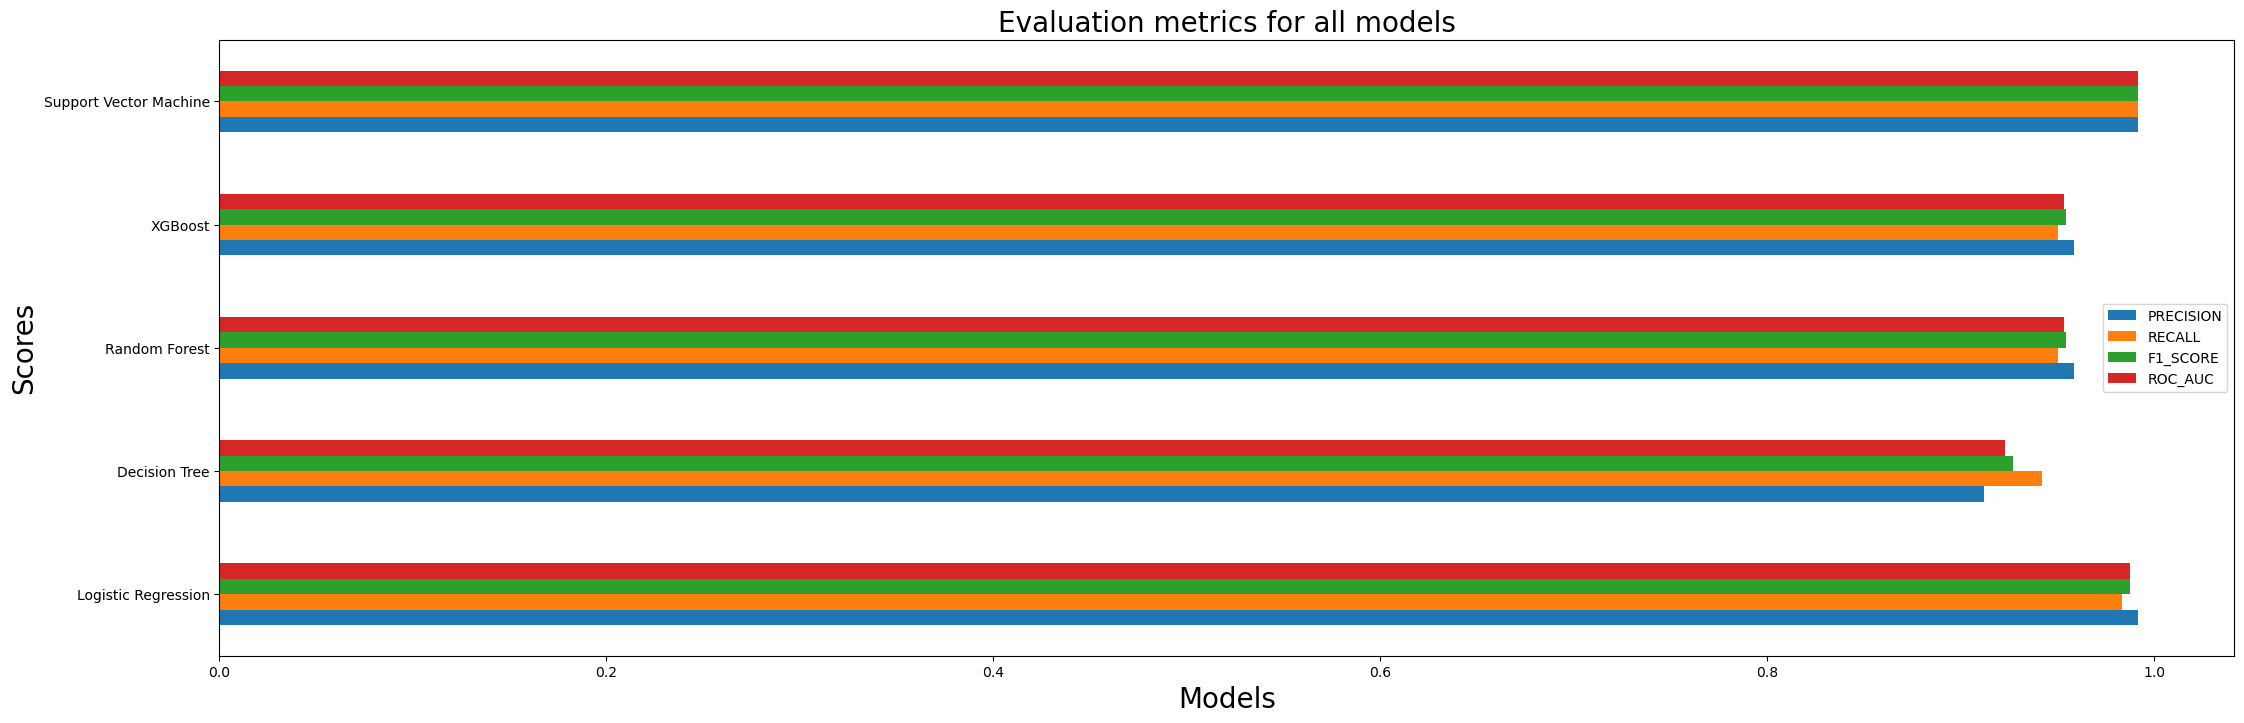

In [44]:
comp.plot(kind="barh", figsize=(26,8))
plt.xlabel("Models", fontsize =20)
plt.ylabel("Scores", fontsize=20)

plt.title("Evaluation metrics for all models", fontsize = 20)
plt.show()

## TARGET CLASS DISTRIBUTION -- PRE TRAINING

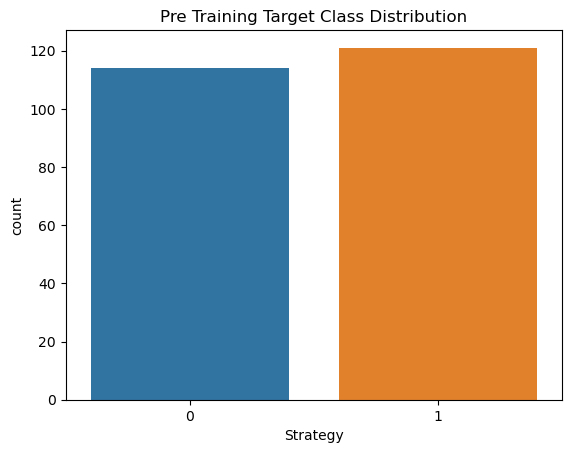

In [45]:
sns.countplot(x= y_test.Strategy, data = y_test)
plt.title("Pre Training Target Class Distribution")
plt.show()

## Evaluate the SVM Model Strategy Count

In [46]:
yhat_svm = model_svc.predict(X_test)
yhat_svm

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

## SVM model predicted strategy count

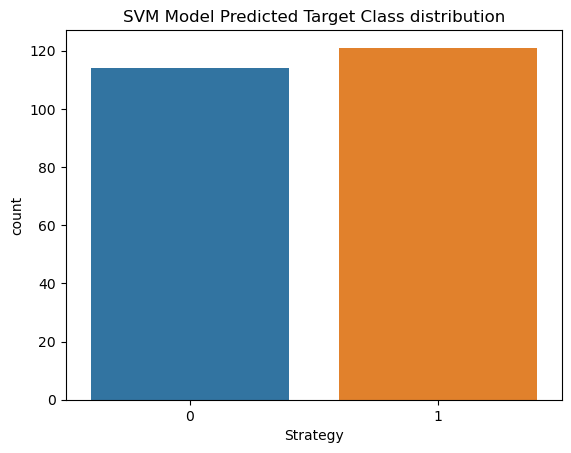

In [47]:
type(yhat_svm)

# converting the NumPy array to a Pandas series
series = pd.Series(yhat_svm)
series

df = pd.DataFrame(series, columns =["Strategy"])
df

sns.countplot(x= df.Strategy, data = df)
plt.title("SVM Model Predicted Target Class distribution", fontsize=12)
plt.show()

# Trading strategy with the prediction for SVM Model

In [51]:
def predict_test(y_test, y_pred):
    
#     define a empty dataframe for copying the y_test so that the original data frame is not impacted
    df_match = pd.DataFrame()
    df_match = y_test.copy()

    # convert prediction numpy array to dataframe
    df_pred = pd.DataFrame(y_pred, columns =['Prediction'])
    #     print(df_pred)

    #     For the match DF Dropping the date index and adding the default index to help join with the prediction DF
    df_match.reset_index(drop=False, inplace=True)
    #     print (df_match)
    #     Merge the data frames to compare the test data with the predicted data 
    df_match = pd.merge(df_match, df_pred,left_index=True, right_index=True)
    #     print (df_match)

    #     Saving the comparison file to verify the prediction results.
    df_match.to_csv("Match_Prediction_SVM.csv")
    
    return

# Call the predict_test function to compare the strategy with the prediction
predict_test(y_test, yhat_svm)